In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

mesg=pd.read_csv("/content/drive/MyDrive/SMSSpamCollection.txt",sep='\t',names=['label','message'] )

In [4]:
mesg

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Basic Analysis

In [5]:
mesg.shape

(5572, 2)

In [6]:
mesg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
mesg.isnull().sum()

,0
label,0
message,0


In [8]:
mesg.duplicated().sum()

np.int64(403)

In [9]:
mesg.drop_duplicates(inplace=True)

In [10]:
mesg.shape

(5169, 2)

In [11]:
mesg['label'].value_counts()
#Imbalanced

,count
label,
ham,4516
spam,653


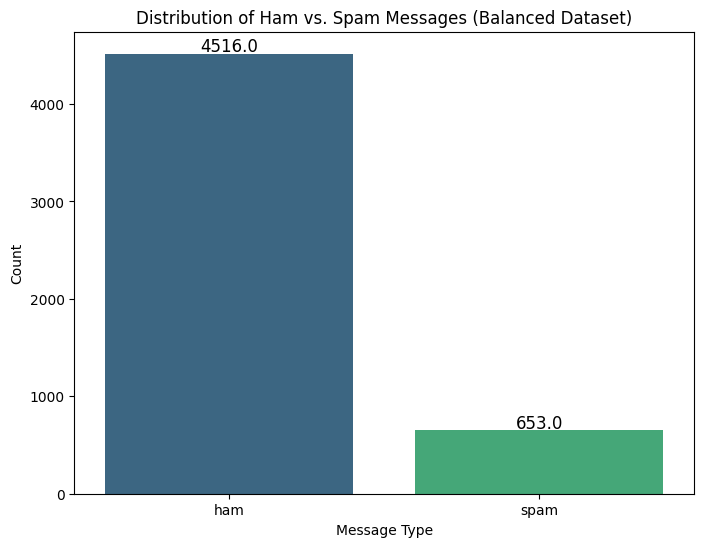

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=mesg, hue='label', palette='viridis', legend=False)
plt.title('Distribution of Ham vs. Spam Messages (Balanced Dataset)')
plt.xlabel('Message Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Text Preprocessing 1



1.   Lowercase
2.   Regex - remove special characters,symbols,...
3.   Word Tokenize
4.   Stopwords
5.   Lemmatization/stemming



In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
def textpreprocessing(df):
  # Reset index to ensure contiguous integer indexing
  df = df.reset_index(drop=True)
  for i in range(0,len(df)):
    #LowerCase
    sentence=df['message'][i].lower()
    #Regex
    sentence=re.sub('[^a-zA-Z0-9]',' ',sentence)
    #Word Tokenize
    words=nltk.word_tokenize(sentence)
    #Stopswords
    words=[word for word in words if word not in stopwords.words('english')]
    #lemmatization
    lemmatizer=WordNetLemmatizer()
    words=[lemmatizer.lemmatize(word) for word in words]
    #Convert back to sentences
    words=' '.join(words)
    df['message'][i]=words
  return df

In [15]:
processed_data=textpreprocessing(mesg)

/tmp/ipython-input-860/1250353247.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['message'][i]=words


In [16]:
processed_data['message']

,message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah think go usf life around though
...,...
5164,2nd time tried 2 contact u u 750 pound prize 2...
5165,b going esplanade fr home
5166,pity mood suggestion
5167,guy bitching acted like interested buying some...


In [17]:
mesg=processed_data

# Split Train and Test Data

In [18]:
X = mesg['message']
y = mesg['label']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

y_train_encoded = pd.get_dummies(y_train, drop_first=True)
y_test_encoded = pd.get_dummies(y_test, drop_first=True)

X_train shape: (4135,)
X_test shape: (1034,)
y_train shape: (4135,)
y_test shape: (1034,)


# Text Preprocessing 2

Choose Any one that perform well

1.   Bag of Words
2.   TF -IDF
3.   Word2vec - Google
4.   Avg Word2vec - Own



In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def Model(X_train_vectorized,y_train_encoded,X_test_vectorized,y_test_encoded):
  #Handle imbalanced data using SMOTE technique
  sm = SMOTE(random_state=42)
  X_train_resampled, y_train_resampled = sm.fit_resample(X_train_vectorized, y_train_encoded)
  #Applay Naive Byes Model
  model = MultinomialNB()
  model.fit(X_train_resampled, y_train_resampled)
  #Predict
  y_pred = model.predict(X_test_vectorized)
  #Evaulate
  accuracy = accuracy_score(y_test_encoded, y_pred)
  print(f"Accuracy: {accuracy}")
  print("Classification Report:")
  print(classification_report(y_test_encoded, y_pred))
  print("Confusion Matrix:")
  print(confusion_matrix(y_test_encoded, y_pred))


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def bagWords(X_train,X_test,y_train_encoded,y_test_encoded):
  cv = CountVectorizer(max_features=5000)
  X_train_vectorized = cv.fit_transform(X_train).toarray()
  X_test_vectorized = cv.transform(X_test).toarray()
  Model(X_train_vectorized,y_train_encoded,X_test_vectorized,y_test_encoded)

def tfidf(X_train,X_test,y_train_encoded,y_test_encoded):
  tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,2), min_df=2)
  X_train_vectorized = tfidf_vectorizer.fit_transform(X_train).toarray()
  X_test_vectorized = tfidf_vectorizer.transform(X_test).toarray()
  Model(X_train_vectorized,y_train_encoded,X_test_vectorized,y_test_encoded)



In [22]:
bagWords(X_train,X_test,y_train_encoded,y_test_encoded)
tfidf(X_train,X_test,y_train_encoded,y_test_encoded)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9613152804642167
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.97      0.98       903
        True       0.82      0.89      0.85       131

    accuracy                           0.96      1034
   macro avg       0.90      0.93      0.92      1034
weighted avg       0.96      0.96      0.96      1034

Confusion Matrix:
[[878  25]
 [ 15 116]]
Accuracy: 0.9632495164410058
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       903
        True       0.81      0.93      0.87       131

    accuracy                           0.96      1034
   macro avg       0.90      0.95      0.92      1034
weighted avg       0.97      0.96      0.96      1034

Confusion Matrix:
[[874  29]
 [  9 122]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Train Word2Vec Model

In [23]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 73.2 MB/s eta 0:00:00


In [24]:
from gensim.models import Word2Vec

In [25]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier # Changed from XGBoost,because MultinomialNB cannot handle negative
#feature values, which Word2Vec embeddings often contain.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def Model_XGBoost(X_train_vectorized,y_train_encoded,X_test_vectorized,y_test_encoded):
  # Handle imbalanced data using SMOTE technique
  sm = SMOTE(random_state=42)
  # Convert y_train_encoded to a 1D array for SMOTE and model fitting
  X_train_resampled, y_train_resampled = sm.fit_resample(X_train_vectorized, y_train_encoded.values.ravel())
  # Apply XGBoost Classifier
  model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Added XGBoost parameters
  model.fit(X_train_resampled, y_train_resampled)
  # Predict
  y_pred = model.predict(X_test_vectorized)
  # Evaluate
  accuracy = accuracy_score(y_test_encoded.values.ravel(), y_pred) # Use ravel for y_test_encoded
  print(f"Accuracy: {accuracy}")
  print("Classification Report:")
  print(classification_report(y_test_encoded.values.ravel(), y_pred))
  print("Confusion Matrix:")
  print(confusion_matrix(y_test_encoded.values.ravel(), y_pred))

  return model

In [26]:
def average_word_vectors(words, model, vector_size):
    vectors = []
    for word in words:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

print("average_word_vectors function defined.")


def Word2VecModel(X_train_words,X_test_words,y_train_encoded,y_test_encoded):

  model_w2v = Word2Vec(vector_size=100, window=5, min_count=1, workers=4, sg=0)
  model_w2v.build_vocab(X_train_words)
  model_w2v.train(X_train_words, total_examples=model_w2v.corpus_count, epochs=10)

  print("Word2Vec model trained successfully.")
  return model_w2v

X_train_words = [message.split() for message in X_train]
X_test_words = [message.split() for message in X_test]

model_w2v=Word2VecModel(X_train_words,X_test_words,y_train_encoded,y_test_encoded)

X_train_w2v = np.array([average_word_vectors(words, model_w2v, model_w2v.vector_size) for words in X_train_words])
X_test_w2v = np.array([average_word_vectors(words, model_w2v, model_w2v.vector_size) for words in X_test_words])

final_Model=Model_XGBoost(X_train_w2v, y_train_encoded, X_test_w2v, y_test_encoded)


average_word_vectors function defined.
Word2Vec model trained successfully.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [07:02:17] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.965183752417795
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       903
        True       0.86      0.86      0.86       131

    accuracy                           0.97      1034
   macro avg       0.92      0.92      0.92      1034
weighted avg       0.97      0.97      0.97      1034

Confusion Matrix:
[[885  18]
 [ 18 113]]


In [27]:
sample_msg="Limited time offer!!! Get 90% discount on premium software. Buy now and save big. Offer expires today!"

def textpreprocessing(msg):
    #LowerCase
    sentence=msg.lower()
    #Regex
    sentence=re.sub('[^a-zA-Z0-9]',' ',sentence)
    #Word Tokenize
    words=nltk.word_tokenize(sentence)
    #Stopswords
    words=[word for word in words if word not in stopwords.words('english')]
    #lemmatization
    lemmatizer=WordNetLemmatizer()
    words=[lemmatizer.lemmatize(word) for word in words]
    #Convert back to sentences
    words=' '.join(words)
    return words

#Preproessing
sample_msg=textpreprocessing(sample_msg)

#Averge Word 2 Vec
sample_msg_words = sample_msg.split()
sample_msg_w2v_vector = average_word_vectors(sample_msg_words, model_w2v, model_w2v.vector_size)

#Prediction
prediction = final_Model.predict(sample_msg_w2v_vector.reshape(1, -1))

if prediction[0] == 0:
    result = 'ham'
elif prediction[0] == 1:
    result = 'spam'
else:
    result = 'unknown'

print(f"The sample message is classified as: {result}")



The sample message is classified as: ham


##  Google Word2Vec Model


In [ ]:
import gensim.downloader as api

print("Downloading 'word2vec-google-news-300' model...")
google_w2v_model = api.load('word2vec-google-news-300')
print("Model loaded successfully.")

[===-----------------------------------------------] 7.1% 118.6/1662.8MB downloaded

In [ ]:
import numpy as np

# Redefine average_word_vectors to handle both Word2Vec and KeyedVectors objects
def average_word_vectors(words, model, vector_size):
    vectors = []
    # Check if the model is a Word2Vec object (has .wv attribute) or KeyedVectors object directly
    if hasattr(model, 'wv'):
        word_vectors = model.wv
    else: # Assume it's a KeyedVectors object directly
        word_vectors = model

    for word in words:
        if word in word_vectors:
            vectors.append(word_vectors[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Get the vector size from the loaded Google Word2Vec model
google_w2v_vector_size = google_w2v_model.vector_size

# Generate average Google Word2Vec embeddings for training data
X_train_google_w2v = np.array([average_word_vectors(words, google_w2v_model, google_w2v_vector_size) for words in X_train_words])

# Generate average Google Word2Vec embeddings for testing data
X_test_google_w2v = np.array([average_word_vectors(words, google_w2v_model, google_w2v_vector_size) for words in X_test_words])

print(f"Shape of X_train_google_w2v: {X_train_google_w2v.shape}")
print(f"Shape of X_test_google_w2v: {X_test_google_w2v.shape}")

In [ ]:
final_Model_google_w2v = Model_XGBoost(X_train_google_w2v, y_train_encoded, X_test_google_w2v, y_test_encoded)

In [ ]:
sample_msg="Your OTP for transaction of ₹8,450 is 739221. Do not share this code with anyone."

def textpreprocessing(msg):
    #LowerCase
    sentence=msg.lower()
    #Regex
    sentence=re.sub('[^a-zA-Z0-9]',' ',sentence)
    #Word Tokenize
    words=nltk.word_tokenize(sentence)
    #Stopswords
    words=[word for word in words if word not in stopwords.words('english')]
    #lemmatization
    lemmatizer=WordNetLemmatizer()
    words=[lemmatizer.lemmatize(word) for word in words]
    #Convert back to sentences
    words=' '.join(words)
    return words

#Preproessing
sample_msg=textpreprocessing(sample_msg)

#Average Google Word2Vec
sample_msg_words = sample_msg.split()
sample_msg_w2v_vector = average_word_vectors(sample_msg_words, google_w2v_model, google_w2v_vector_size)

#Prediction
prediction = final_Model_google_w2v.predict(sample_msg_w2v_vector.reshape(1, -1))

if prediction[0] == 0:
    result = 'ham'
elif prediction[0] == 1:
    result = 'spam'
else:
    result = 'unknown'

print(f"The sample message is classified as: {result}")

In [ ]:
import joblib

# Define the filename for saving the model
model_filename = 'google_w2v_model.pkl'

# Save the model to the specified file
joblib.dump(final_Model_google_w2v, model_filename)

print(f"Model successfully saved to {model_filename}")